In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

def get_relay_curve(In=1, order=4, C=1):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-C)**order
        return 10**t
    return relay_curve


In [2]:
curve_u = np.genfromtxt('curve_u.txt', delimiter=';', dtype=float)
curve_u = curve_u[curve_u[:, 0].argsort()]
i_u = np.round(curve_u[:, 0],2)
t_u = np.round(curve_u[:, 1],2)
display(i_u, t_u)

curve_l = np.genfromtxt('curve_l.txt', delimiter=';', dtype=float)
curve_l = curve_l[curve_l[:, 0].argsort()]
i_l = np.round(curve_l[:, 0],2)
t_l = np.round(curve_l[:, 1],2)
display(i_l, t_l)

array([1.32, 1.35, 1.47, 1.64, 1.88, 2.42, 3.09, 4.05, 4.97, 6.95, 9.96])

array([9065.55, 6077.1 , 3174.45, 1808.53, 1065.  ,  489.  ,  263.21,
        144.68,   96.38,   52.29,   28.5 ])

array([1.16, 1.18, 1.2 , 1.25, 1.37, 1.57, 1.84, 2.27, 2.99, 3.77, 4.76,
       6.52, 7.96, 9.97])

array([9.13193e+03, 6.02790e+03, 3.18247e+03, 1.63476e+03, 7.04000e+02,
       3.22800e+02, 1.69110e+02, 8.03300e+01, 3.75600e+01, 2.12800e+01,
       1.25900e+01, 6.73000e+00, 4.71000e+00, 3.33000e+00])

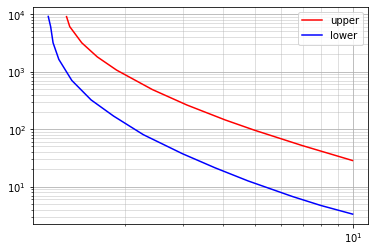

In [3]:
xdata = np.array(i_u)
ydata = np.array(t_u)
plt.plot(xdata, ydata, 'r-', label='upper')

xdata = np.array(i_l)
ydata = np.array(t_l)
plt.plot(xdata, ydata, 'b-', label='lower')

plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()

[2.60522, -1.29891, -0.23882, 0.13048, 0.02979, -0.01215]

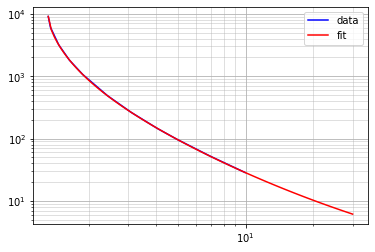

In [6]:
# Curve fitting upper

In = 1.3
order=5
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 30, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))

[2.09346, -1.73994, -0.1063, 0.25258, 0.38134, -1.13176, 0.72079]

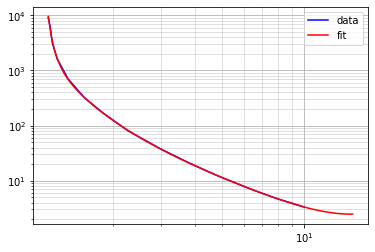

In [13]:
# Curve fitting lower

In=1
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 15, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(list(np.round(coeff,5)))